# Part-1

In [1]:
!pip install -qU langchain\
    langchain-community\
    langchain-together\
    langchain-core\
    faiss-cpu\
    faiss-gpu\
    langgraph\
    sentence-transformers\
    gradio\
    pymupdf\
    pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
from dotenv import load_dotenv
from langchain_community.document_loaders.web_base import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_together import ChatTogether
from langchain_community.vectorstores import FAISS
from langchain.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import Literal
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from IPython.core.display import Markdown
from langchain_core.messages import HumanMessage, AIMessage
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PyPDFLoader

In [3]:
# Needed API keys 

os.environ["TAVILY_API_KEY"] = ""
os.environ["TOGETHER_API_KEY"] = ""

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
main_page_URL = "https://stanford.edu/~jurafsky/slp3/"

# Fetch the page content
response = requests.get(main_page_URL)
if response.status_code == 200:
    page_content = response.text
else:
    raise Exception(f"Failed to fetch the page content: {response.status_code}")

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(page_content, 'html.parser')

# Find all anchor tags with href attribute
anchor_tags = soup.find_all('a', href=True)

# Extract URLs containing 'pdf' and append to the list
pdf_urls = []
for tag in anchor_tags:
    href = tag['href']
    if 'pdf' in href and 'slides' not in href:  # Check if 'pdf' is in the URL
        # Ensure the URL is absolute
        if not href.startswith('http'):
            href = main_page_URL + href
        pdf_urls.append(href)

# Print the extracted PDF URLs
for link in pdf_urls:
    print(link)

https://stanford.edu/~jurafsky/slp3/ed3bookfeb3_2024.pdf
https://stanford.edu/~jurafsky/slp3/2.pdf
https://stanford.edu/~jurafsky/slp3/3.pdf
https://stanford.edu/~jurafsky/slp3/4.pdf
https://stanford.edu/~jurafsky/slp3/5.pdf
https://stanford.edu/~jurafsky/slp3/6.pdf
https://stanford.edu/~jurafsky/slp3/7.pdf
https://stanford.edu/~jurafsky/slp3/8.pdf
https://stanford.edu/~jurafsky/slp3/9.pdf
https://stanford.edu/~jurafsky/slp3/10.pdf
https://stanford.edu/~jurafsky/slp3/11.pdf
https://stanford.edu/~jurafsky/slp3/13.pdf
https://stanford.edu/~jurafsky/slp3/14.pdf
https://stanford.edu/~jurafsky/slp3/15.pdf
https://stanford.edu/~jurafsky/slp3/16.pdf
https://stanford.edu/~jurafsky/slp3/17.pdf
https://stanford.edu/~jurafsky/slp3/18.pdf
https://stanford.edu/~jurafsky/slp3/19.pdf
https://stanford.edu/~jurafsky/slp3/20.pdf
https://stanford.edu/~jurafsky/slp3/21.pdf
https://stanford.edu/~jurafsky/slp3/22.pdf
https://stanford.edu/~jurafsky/slp3/23.pdf
https://stanford.edu/~jurafsky/slp3/A.pdf
https:

In [6]:
chapter2_6 = pdf_urls[1:10]
print(chapter2_6)

['https://stanford.edu/~jurafsky/slp3/2.pdf', 'https://stanford.edu/~jurafsky/slp3/3.pdf', 'https://stanford.edu/~jurafsky/slp3/4.pdf', 'https://stanford.edu/~jurafsky/slp3/5.pdf', 'https://stanford.edu/~jurafsky/slp3/6.pdf', 'https://stanford.edu/~jurafsky/slp3/7.pdf', 'https://stanford.edu/~jurafsky/slp3/8.pdf', 'https://stanford.edu/~jurafsky/slp3/9.pdf', 'https://stanford.edu/~jurafsky/slp3/10.pdf']


In [7]:
documents = []
all_chunks = []

In [8]:
for url in chapter2_6:
  loader = PyMuPDFLoader(url)
  documents.append(loader.load()[0])

In [9]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)

# Split each document into chunks
for doc in documents:
  chunks = text_splitter.split_documents([doc])  # Wrap doc in a list
  all_chunks.extend(chunks)

In [10]:
#docs = [PyPDFLoader(url).load() for url in chapter2_6]
#loader = PyMuPDFLoader(chapter2_6, bs_get_text_kwargs={"strip": True})
#docs = loader.load()

In [11]:
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
# chunks = text_splitter.split_documents(docs)

# Part-2

In [12]:
embedding_function = HuggingFaceEmbeddings(show_progress=True, multi_process=True)
vector_store = FAISS.from_documents(documents=all_chunks, embedding=embedding_function)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Part-3

In [13]:
!pip install rank_bm25


In [14]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever


In [15]:
# # initialize the bm25 retriever and faiss retriever
# bm25_retriever = BM25Retriever.from_documents(all_chunks)
# bm25_retriever.k = 2

In [16]:
# Create BM25 retriever
bm25_retriever = BM25Retriever.from_documents(all_chunks)

# Create FAISS retriever
faiss_retriever = vector_store.as_retriever()

# Create an ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever],
    weights=[0.5, 0.5]  # Adjust weights as necessary
)

In [17]:
# Now you can use the ensemble retriever to retrieve documents
query = "language model"
results = ensemble_retriever.get_relevant_documents(query)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [18]:
results

[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/3.pdf', 'file_path': 'https://stanford.edu/~jurafsky/slp3/3.pdf', 'page': 0, 'total_pages': 30, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'LaTeX with hyperref', 'producer': 'pdfTeX-1.40.21', 'creationDate': "D:20240203145934-08'00'", 'modDate': "D:20240203145934-08'00'", 'trapped': ''}, page_content='language model\nLM\nupcoming words? It turns out that the large language models that revolutionized\nmodern NLP are trained just by predicting words!! As we’ll see in chapters 7-10,\nlarge language models learn an enormous amount about language solely from being\ntrained to predict upcoming words from neighboring words.\nLanguage models can also assign a probability to an entire sentence. For exam-\nple, they can predict that the following sequence has a much higher probability of\nappearing in a text:\nall of a sudden I notice three guys standing on the sidewalk\nthan does th

# Part-4

In [19]:
together_api_key = os.getenv("TOGETHER_API_KEY")

llm = ChatTogether(
    together_api_key=together_api_key,
    model="meta-llama/Llama-3-70b-chat-hf",
    temperature= 0
    )

In [97]:
router_prompt_template = (
 "You are an expert in routing user queries to either a VectorStore or A Fallback Message or a SearchEngine\n"
 "Your VectorStore contains data about NLP or natural language process chapters from jurafsky book. if the given query is about NLP, choose VectorStore"
 "If the query is not related to natural language process or NLP questions at all, DO NOT choose any tool."
 "If the query is related to computer science like programming, database or something like them, choose SearchEngine"
 "Give me only and only the name of the tool you chose and nothing more. If there are no chose tool, give me back the string None"
 "{output_instructions}"
 "query: {query}"
)


prompt = ChatPromptTemplate.from_template(
    template=router_prompt_template,
)

In [88]:
from typing import Literal



class ChosenTool(BaseModel):
    tool_name: Literal['None', "VectorStore", "SearchEngine"] = Field(description="the tool that was chosen by LLM in question routing stage")


question_router_parser = PydanticOutputParser(pydantic_object=ChosenTool)

question_router_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"tool_name": {"title": "Tool Name", "description": "the tool that was chosen by LLM in question routing stage", "enum": ["None", "VectorStore", "SearchEngine"], "type": "string"}}, "required": ["tool_name"]}\n```'

In [89]:
question_router = prompt | llm | question_router_parser

res = question_router.invoke({"query": "do you know anything about database",
                                   "output_instructions": question_router_parser.get_format_instructions()
 })
res

ChosenTool(tool_name='SearchEngine')

In [94]:
prompt_template_a = "Hi, I'm learning {tool} to use it with LLMs and make awesome stuff!"

prompt_chat_template_a = ChatPromptTemplate.from_template(
    template=prompt_template_a,
)


In [96]:
chain = prompt_chat_template_a | llm

chain.invoke(
    {
    "tool":"llama_index"
  }
).content

"That's great to hear! LlamaIndex is an amazing tool for building applications with Large Language Models (LLMs). It provides a simple and efficient way to index and query large language models, making it easier to integrate them into your projects.\n\nWhat kind of awesome stuff are you planning to build with LlamaIndex and LLMs? Are you looking to create a chatbot, a language-based game, or something entirely new?\n\nIf you have any questions or need help getting started with LlamaIndex, feel free to ask! I'm here to assist you."

# Part-5

In [130]:
!pip install -U langchain-community tavily-python

In [131]:
!pip install -U langchain-openai


In [132]:
os.environ["TAVILY_API_KEY"] = "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"

In [133]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults

# Load API key from environment variable (assuming it's set as TAVILY_API_KEY)
api_key = os.environ.get("TAVILY_API_KEY")

if not api_key:
    raise ValueError("TAVILY_API_KEY environment variable not set!")

In [134]:
tavily_tool = TavilySearchResults(api_key=api_key, max_results=5)
response = tavily_tool.invoke("who is president of USA rightnow?")

In [135]:
response

[{'url': 'https://www.featureweekly.com/what-is-the-net-worth-of-joe-biden-heres-the-latest/',
  'content': 'Here’s the Latest President Joe Biden, the 46th and current President of the United States, has been active as a government official since he was elected to the United States Senate at the age of 29, the youngest person ever to do so. Share This Post Related Posts How Hybrid Work and Flexible Spaces Are Changing Business Strategy Strategies for Effective Data Monetization and Revenue Generation 6 iPhone Tips Every Business Owner Should Know Spotify Rolls Out New Basic Streaming Plan for US Customers Categories Recent Posts Advertisement Popular Posts Categories Most Views Posts Recent Posts Forbes magazine reported that Biden had an estimated net worth of $8 million when he took office as president in 2021, and that it has increased by 25% since then, due to his presidential salary, rising real estate values, and a strong stock market that increased the value of his investments.

In [136]:
!pip install -U langchain-openai langchainhub

In [137]:
from pydantic import BaseModel, Field
from typing import List, Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.documents import Document

In [146]:
from langchain_core.documents import Document

def document_tavily_langchain(response):
  documents = []

  for item in response:
    document = Document(
        page_content=item['content'],
        metadata={"source": item['url']}
    )
    documents.append(document)

  return documents

query_ = "do you know anything about database"

In [139]:
response = tavily_tool.invoke(query_)
responses_tavily = document_tavily_langchain(response)

In [141]:
responses_tavily

[Document(metadata={'source': 'https://www.forbes.com/sites/ayaspencer/2024/03/06/why-all-policymakers-must-understand-the-basics-of-database-design/'}, page_content="Why All Policymakers Must Understand The Basics Of Database Design The United States, Capitol Dome background in retro style In the world of tech and innovation, there's a perception that new and disruptive technologies originate solely from a select group of tech elites in Silicon Valley. So simply put, a database is a structured system to efficiently organize data, while database design is the method of organizing data within these systems.  Often, by the time a technology reaches the masses, we find ourselves simply as consumers, offering up our data without a thorough understanding of how it's being used to deliver a service.  While this solution sounds promising in addressing the global mental health crisis, a lack of understanding about the backend database design of Help123 can result in some serious consequences. 

In [142]:
# Example to show the output
for doc in responses_tavily:
    print(f"Content: {doc.page_content}\nSource: {doc.metadata['source']}\n")

Content: Why All Policymakers Must Understand The Basics Of Database Design The United States, Capitol Dome background in retro style In the world of tech and innovation, there's a perception that new and disruptive technologies originate solely from a select group of tech elites in Silicon Valley. So simply put, a database is a structured system to efficiently organize data, while database design is the method of organizing data within these systems.  Often, by the time a technology reaches the masses, we find ourselves simply as consumers, offering up our data without a thorough understanding of how it's being used to deliver a service.  While this solution sounds promising in addressing the global mental health crisis, a lack of understanding about the backend database design of Help123 can result in some serious consequences.  For example, pulling data on medication side effects from one source and information on side effects of another medication from a separate source might cause

In [143]:
#search_engine_chain = prompt | tavily_tool | document_tavily_langchain

# tavily_check_chain = search_engine_chain.invoke({"query": "do you know anything about database",
#                                    "output_instructions": question_router_parser.get_format_instructions()
#  })
# tavily_check_chain

# search_engine_chain = tavily_tool | query_

# Part-6

In [166]:
router_prompt_template_relation = (
 "You are an expert to understant relation between a query and documents"
 "If the query is not related to documents, choose irrelevant."
"If the query is related to documents, choose relevant."
 "{output_instructions}"
 "query: {query}"
 "documents: {documents}"
)


prompt_relation = ChatPromptTemplate.from_template(
    template=router_prompt_template_relation,
)

In [167]:
from typing import Literal



class ChosenTool_relation(BaseModel):
    tool_name: Literal['irrelevant', 'relevant'] = Field(description="the tool that was chosen by LLM in question routing stage")


relation_router_parser = PydanticOutputParser(pydantic_object=ChosenTool_relation)

relation_router_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"tool_name": {"description": "the tool that was chosen by LLM in question routing stage", "enum": ["irrelevant", "relevant"], "title": "Tool Name", "type": "string"}}, "required": ["tool_name"]}\n```'

In [178]:
relevancy_check_chain = prompt_relation | llm | relation_router_parser

res_relation = relevancy_check_chain.invoke({"query": "my name is asghar.",
                                    "documents": responses_tavily,
                                   "output_instructions": relation_router_parser.get_format_instructions()
 })


In [179]:
res_relation

ChosenTool_relation(tool_name='irrelevant')

In [180]:
res_relation_second = relevancy_check_chain.invoke({"query": "do you know anything about database?",
                                    "documents": responses_tavily,
                                   "output_instructions": relation_router_parser.get_format_instructions()
 })

In [181]:
res_relation_second

ChosenTool_relation(tool_name='relevant')

# Part-7

In [185]:
fallback_prompt = ChatPromptTemplate.from_template(
    (
        "You are a friendly NLP assistant and computer science engineer that created by NLP Staff Course in University of Tehran.\n"
        "Do not respond to queries that are not related to NLP and computer science.\n"
        "If a query is not related to NLP and computer science, acknowledge your limitations.\n"
        "Provide concise responses to only NLP and computer science queries.\n\n"
        "Current conversations:\n\n{chat_history}\n\n"
        "human: {query}"
    )
)

fallback_chain = (
    {
        "chat_history": lambda x: "\n".join(
            [
                (
                    f"human: {msg.content}"
                    if isinstance(msg, HumanMessage)
                    else f"AI: {msg.content}"
                )
                for msg in x["chat_history"]
            ]
        ),
        "query": itemgetter("query") ,
    }
    | fallback_prompt
    | llm
    | StrOutputParser()
)

fallback_chain.invoke(
    {
        "query": "Hello",
        "chat_history": [],
    }
)

"Hello! I'm happy to help with any NLP or computer science-related questions you may have. What's on your mind?"

# Part-8

In [184]:
generate_with_context_template = (
    "You are a helpful assistant. Answer the query below based only on the provided context. If the given context is not relevant, DO NOT answer based on your own knowledge\n\n"
    "context: {context}\n\n"
    "query: {query}"
)


generate_with_context_prompt = ChatPromptTemplate.from_template(generate_with_context_template)
generate_with_context_chain = generate_with_context_prompt | llm | StrOutputParser()

query = "Do you know anything about RNN?"
context = ensemble_retriever.get_relevant_documents(query)
# context = "my name is vahid :)"
response = generate_with_context_chain.invoke({"query": query, "context": context})

Markdown(response)

According to the provided context, I can tell you that a Recurrent Neural Network (RNN) is a type of network that contains a cycle within its network connections, meaning that the value of some unit is directly or indirectly dependent on its own earlier outputs as an input. RNNs are powerful but difficult to reason about and train. There are constrained architectures, such as Elman Networks, that have proven to be extremely effective when applied to language. RNNs have a mechanism that deals directly with the sequential nature of language, allowing them to handle the temporal nature of language without the use of arbitrary fixed-sized windows.

# Part-9

In [186]:
from typing import TypedDict, Annotated
from langchain_core.documents import Document
from langchain_core.messages.base import BaseMessage
import operator

In [273]:
class AgentSate(TypedDict):
    """The dictionary keeps track of the data required by the various nodes in the graph"""

    query: str
    chat_history:list[BaseMessage]
    generation: str
    documents: list[Document]


def retrieve_node(state: dict):
    """
    Retrieve relevent documents from the vectorstore

    query: str

    return list[Document]
    """
    query = state["query"]
    documents = ensemble_retriever.invoke(input=query)
    return {"documents": documents}

def search_engin_node(state: dict):#, usable=True):
    query = state["query"]
    generation = tavily_tool.invoke(query)
    documents_tavily_langchain = document_tavily_langchain(generation)
    return {"documents": documents_tavily_langchain}

def filter_docs_node(state: dict):
    query = state["query"]
    documents = state["documents"]
    generation = relevancy_check_chain.invoke({"query": query, "documents": documents})
    return {"generation": generation}


def fallback_node(state: dict):
    """
    Fallback to this node when there is no tool call
    """
    query = state["query"]
    chat_history = state["chat_history"]
    generation = fallback_chain.invoke({"query": query, "chat_history": chat_history})
    return {"generation": generation}



def generate_with_context_node(state: dict):
    query = state["query"]
    documents = state["documents"]

    generation = generate_with_context_chain.invoke({"query": query, "context": documents})
    return {"generation": generation}



def router_node(state: dict):
    query = state["query"]
    try:
        response = question_router.invoke({"query": query,
                                   "output_instructions": question_router_parser.get_format_instructions()
        })
        print(response)
    except Exception:
        print("Exception in getting response")
        return "LLMFallback"
    try:
      chosen_tool = response.tool_name.lower()
    except Exception:
        return "LLMFallback"

    if chosen_tool == 'none':
        print("---No tool called---")
        return "LLMFallback"

    if chosen_tool == "vectorstore":
        print("---Routing to VectorStore---")
        return "VectorStore"

    if chosen_tool == "searchengine":
        print("---Routing to SearchEngine---")
        return "SearchEngine"




    # try:
    #   res_relation = relevancy_check_chain.invoke({"query": query,
    #                                 #"documents": responses_tavily,
    #                                "output_instructions": relation_router_parser.get_format_instructions()
    #     })
    # except Exception:
    #     print("Exception in getting response")
    #     return "LLMFallback"

    # try:
    #   chosen_tool_relation = res_relation.tool_name.lower()
    # except Exception:
    #     print("---No tool called---")
    #     return "LLMFallback"
    # if chosen_tool_relation == "relevant":
    #     print("---Routing to filter_relevant---")
    #     return "relevant"

    # if chosen_tool_relation == "irrelevant":
    #     print("---Routing to filter_irrelevant---")
    #     return "irrelevant"



In [274]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentSate)

workflow.add_node("vector_store", retrieve_node)
workflow.add_node("search_engine", search_engin_node)
# workflow.add_node("filter_docs", filter_docs_node)
workflow.add_node("fallback", fallback_node)
workflow.add_node("generate_with_context", generate_with_context_node)

workflow.set_conditional_entry_point(
    router_node,
    {
        "LLMFallback": "fallback",
        "VectorStore": "vector_store",
        "SearchEngine": "search_engine",
        # "relevant": "filter_docs",
        # "irrelevant": "filter_docs",
    },
)


workflow.add_edge("fallback", END)
workflow.add_edge("search_engine", "generate_with_context")
workflow.add_edge("vector_store", "generate_with_context")
workflow.add_edge("generate_with_context", END)

# workflow.add_edge("vector_store", "relevant")
# workflow.add_edge("relevant", "generate_with_context")
# workflow.add_edge("search_engine", "relevant")
# workflow.add_edge("Irrelevant", "search_engine")
# workflow.add_edge("generate_with_context", END)

# workflow.add_edge("fallback", END)

In [275]:
app = workflow.compile(debug=False)
plot = app.get_graph().draw_mermaid_png()

with open("plot.png", "wb") as fp:
    fp.write(plot)

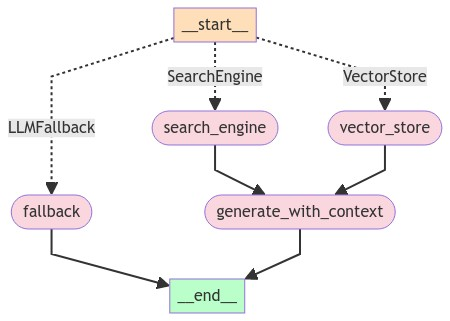

In [276]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img = Image.open(BytesIO(plot))
display(img)

In [271]:
response = app.invoke({"query": "do you anything about LSTM?", "chat_history": []})
Markdown(response["generation"])

tool_name='VectorStore'
---Routing to VectorStore---


Yes, I do! According to the provided context, LSTM (Long Short-Term Memory) is mentioned in the chapter about RNNs (Recurrent Neural Networks). Specifically, it is mentioned as a variant of RNNs that deals directly with the sequential nature of language, allowing them to handle the temporal nature of language without the use of arbitrary fixed-sized windows.

In [265]:
response = app.invoke({"query": "do you anything president of iran?", "chat_history": []})
Markdown(response["generation"])

tool_name='None'
---No tool called---


I'm afraid I'm not knowledgeable about that topic. As a friendly NLP assistant and computer science engineer, my expertise lies in Natural Language Processing and Computer Science. I'm not equipped to provide information on political figures or non-technical topics. If you have any questions related to NLP or computer science, I'd be happy to help!

In [277]:
response = app.invoke({"query": "do you anything database?", "chat_history": []})
Markdown(response["generation"])

tool_name='SearchEngine'
---Routing to SearchEngine---


Based on the provided context, I can see that databases are mentioned in several articles. Here's what I can gather:

* A database is a structured system to efficiently organize data, and database design is the method of organizing data within these systems.
* Database technology can be used to make it easier for AI to find data stored in corporate systems.
* Traditional database technology might struggle to understand complex user queries, such as searching for a used car with specific features.
* There are different types of database systems, such as Oracle, which has updated its database technology for AI chatbots.
* Database abstraction layers, like Neurelo, can make distributed scaling easier and provide a common piece of data access infrastructure for developers.

So, to answer your question, yes, I can see that databases are an important topic in the provided context!

In [201]:
import gradio as gr
from uuid import uuid4

history = {}
session_id = str(uuid4())

def chat(query):

    # Initialize the chat history for the current session
    if session_id not in history:
        history[session_id] = []

    chat_history = history[session_id]

    # Invoke the app with the current query and chat history
    result = app.invoke({"query": query, "chat_history": chat_history})

    # Separate the response from the retrieved documents
    response = result["generation"]
    documents = result["documents"]

    # Add the current exchange to the chat history
    chat_history.extend([HumanMessage(content=query), AIMessage(content=response)])

    if not documents:
        return response, documents

    documents = [
        f"{doc.page_content}\nsource: {doc.metadata['source']}" for doc in documents
    ]

    return response, "\n\n".join(documents)

# Create the Gradio interface
demo = gr.Interface(
    fn=chat,
    inputs=gr.Textbox(label="Question"),
    outputs=[gr.Textbox(label="Response"), gr.Textbox(label="Retrieved Documents")],
    title="RAG Chatbot",
    description="Ask a health-related query and the chatbot will generate a response using Retrieval Augmented Generation.",
)

if __name__ == "__main__":
    demo.launch(share=True, inline=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://08c320b4632cb94974.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
